# HashBench results

# Benchmark Results

This notebook shows the results of running the benchmark program on
various systems.

## Setup

Let’s import some libraries we will need:

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

And import the results:

In [2]:
rdir = Path('results')

In [3]:
results = pd.concat({
    f.stem: pd.read_table(f, sep='\t')
    for f in rdir.glob('*.tsv')
}, names=['System']).reset_index('System').reset_index(drop=True)

## Result Table

Let’s compute a result table, showing MiB/s for each algorithm:

In [4]:
tbl = results.pivot(index='System', columns='hash', values='MiB/s')
tbl.style.format(precision=1).set_table_attributes('class="dataframe table table-striped"')

hash,Blake2b-256,MD5,SHA-1,SHA-256,SHA-512,SHA3-256,SHA3-512
System,,,,,,,
Atom D2701,168.9,205.9,112.7,52.8,89.1,57.8,30.8
MBA M2,1058.8,594.7,964.8,341.8,553.8,611.6,328.1
RK3568,278.4,239.7,223.1,107.1,174.6,113.8,61.6
RPi 4,nan,248.0,184.5,107.8,178.6,110.4,59.1
i7-1185G7 SL4,539.1,546.0,1646.8,1426.0,435.8,241.3,143.7
i9-9900,1059.3,791.6,738.4,285.3,545.6,372.4,199.2


And a barchart for fun:

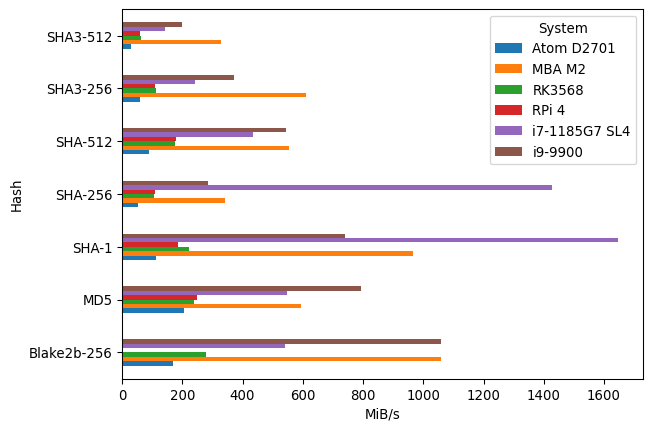

In [5]:
tbl.T.plot.barh()
plt.xlabel('MiB/s')
plt.ylabel('Hash')
plt.show()

The i7-11xx processors have Intel’s SHA hash extensions which RustCrypto
can use for SHA-1 and SHA-256, which explains the substantially higher
performance of those hashes on that chip, even though it is a laptop CPU
(compared to the desktop i9 in the test processors).